# Business Case: Walmart - Confidence Interval and CLT

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('walmart_data.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


# 1. Defining Problem Statement and Analysing basic metrics
* **Observations On:**
    - Shape of data
    - Data Types of all attributes
    - Conversion of Categorical attributes to category (if required)
    - Statistical Summary

In [3]:
df.shape

(550068, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [5]:
cols = ['Occupation', 'Marital_Status', 'Product_Category']
df[cols] = df[cols].astype('object')

In [6]:
df.describe()

,User_ID,Purchase
count,5.500680e+05,550068.000000
mean,1.003029e+06,9263.968713
std,1.727592e+03,5023.065394
min,1.000001e+06,12.000000
25%,1.001516e+06,5823.000000
50%,1.003077e+06,8047.000000
75%,1.004478e+06,12054.000000
max,1.006040e+06,23961.000000


In [7]:
df.describe(include='object')

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068
unique,3631,2,7,21,3,5,2,20
top,P00265242,M,26-35,4,B,1,0,5
freq,1880,414259,219587,72308,231173,193821,324731,150933


In [8]:
for col in df.columns:
    print(col, df[col].isnull().sum())

User_ID 0
Product_ID 0
Gender 0
Age 0
Occupation 0
City_Category 0
Stay_In_Current_City_Years 0
Marital_Status 0
Product_Category 0
Purchase 0


Hence there are no null values in our data

In [9]:
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                    object
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                object
Product_Category              object
Purchase                       int64
dtype: object

In [10]:
df.memory_usage()

Index                             128
User_ID                       4400544
Product_ID                    4400544
Gender                        4400544
Age                           4400544
Occupation                    4400544
City_Category                 4400544
Stay_In_Current_City_Years    4400544
Marital_Status                4400544
Product_Category              4400544
Purchase                      4400544
dtype: int64

# 2. Non-Graphical Analysis: Value Counts and Unique Attributes

In [11]:
categorical_cols = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
df[categorical_cols].melt().groupby(['variable', 'value'])[['value']].count()/len(df)

value
variable                   value          
Age                        0-17   0.027455
                           18-25  0.181178
                           26-35  0.399200
                           36-45  0.199999
                           46-50  0.083082
                           51-55  0.069993
                           55+    0.039093
City_Category              A      0.268549
                           B      0.420263
                           C      0.311189
Gender                     F      0.246895
                           M      0.753105
Marital_Status             0      0.590347
                           1      0.409653
Occupation                 0      0.126599
                           1      0.086218
                           2      0.048336
                           3      0.032087
                           4      0.131453
                           5      0.022137
                           6      0.037005
                           7      0.107501
                           8      0.002811
                           9      0.011437
                           10     0.023506
                           11     0.021063
                           12     0.056682
                           13     0.014049
                           14     0.049647
                           15     0.022115
                           16     0.046123
                           17     0.072796
                           18     0.012039
                           19     0.015382
                           20     0.061014
Product_Category           1      0.255201
                           2      0.043384
                           3      0.036746
                           4      0.021366
                           5      0.274390
                           6      0.037206
                           7      0.006765
                           8      0.207111
                           9      0.000745
                           10     0.009317
                           11     0.044153
                           12     0.007175
                           13     0.010088
                           14     0.002769
                           15     0.011435
                           16     0.017867
                           17     0.001051
                           18     0.005681
                           19     0.002914
                           20     0.004636
Stay_In_Current_City_Years 0      0.135252
                           1      0.352358
                           2      0.185137
                           3      0.173224
                           4+     0.154028

**Observations**
   - ~ 80% of the users are between the age 18-50 (40%: 26-35, 18%: 18-25, 20%: 36-45)
   - 75% of the users are Male and 25% are Female
   - 60% Single, 40% Married
   - 35% Staying in the city from 1 year, 18% from 2 years, 17% from 3 years
   - Total of 20 product categories are there
   - There are 20 differnent types of occupations in the city

In [12]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

In [13]:
df['User_ID'].value_counts()

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64

In [14]:
df['Product_ID'].value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64

In [15]:
df['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [16]:
df['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [17]:
df['Occupation'].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [18]:
df['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [19]:
df['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [20]:
df['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [21]:
df['Product_Category'].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64

In [22]:
df['Purchase'].value_counts()

7011     191
7193     188
6855     187
6891     184
7012     183
        ... 
23491      1
18345      1
3372       1
855        1
21489      1
Name: Purchase, Length: 18105, dtype: int64

# 3. Visual Analysis - Univariate and Multivariate

## 3.1 Univariate Analysis

### `Continuous Variables`

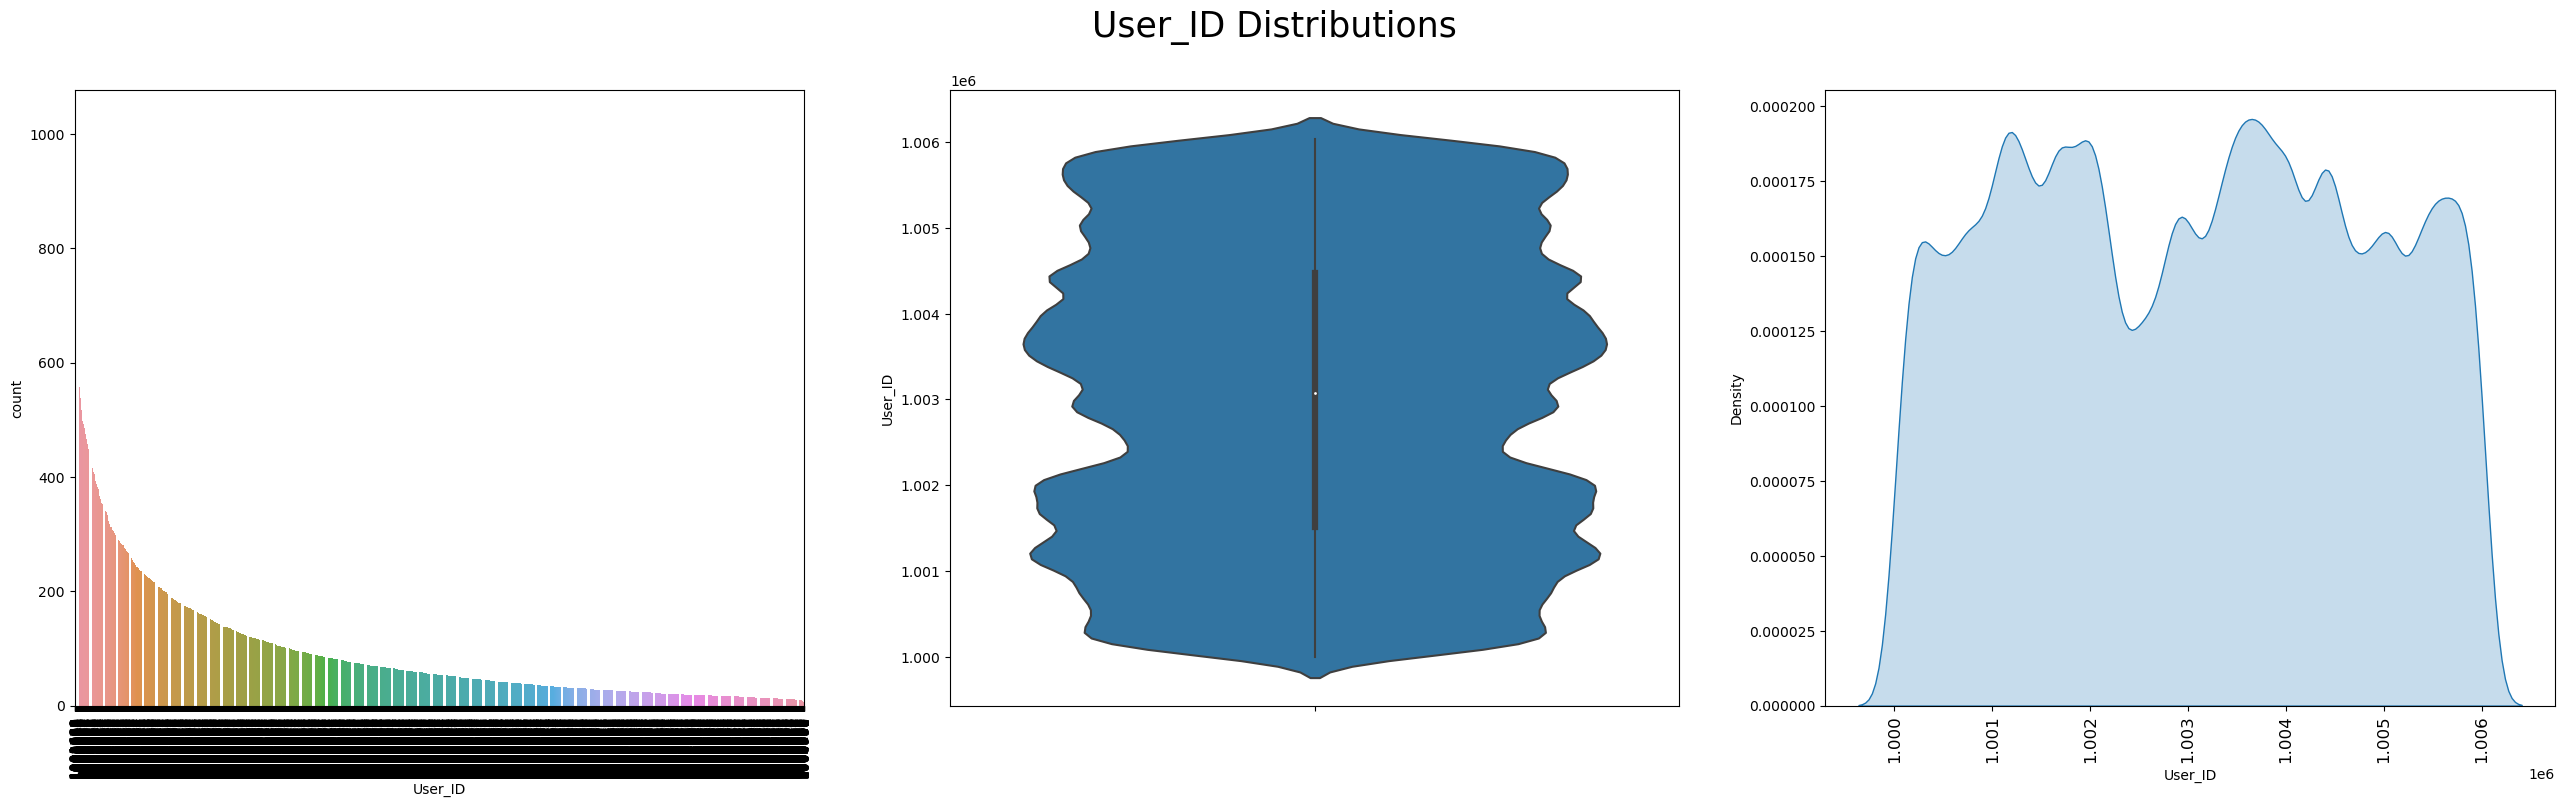

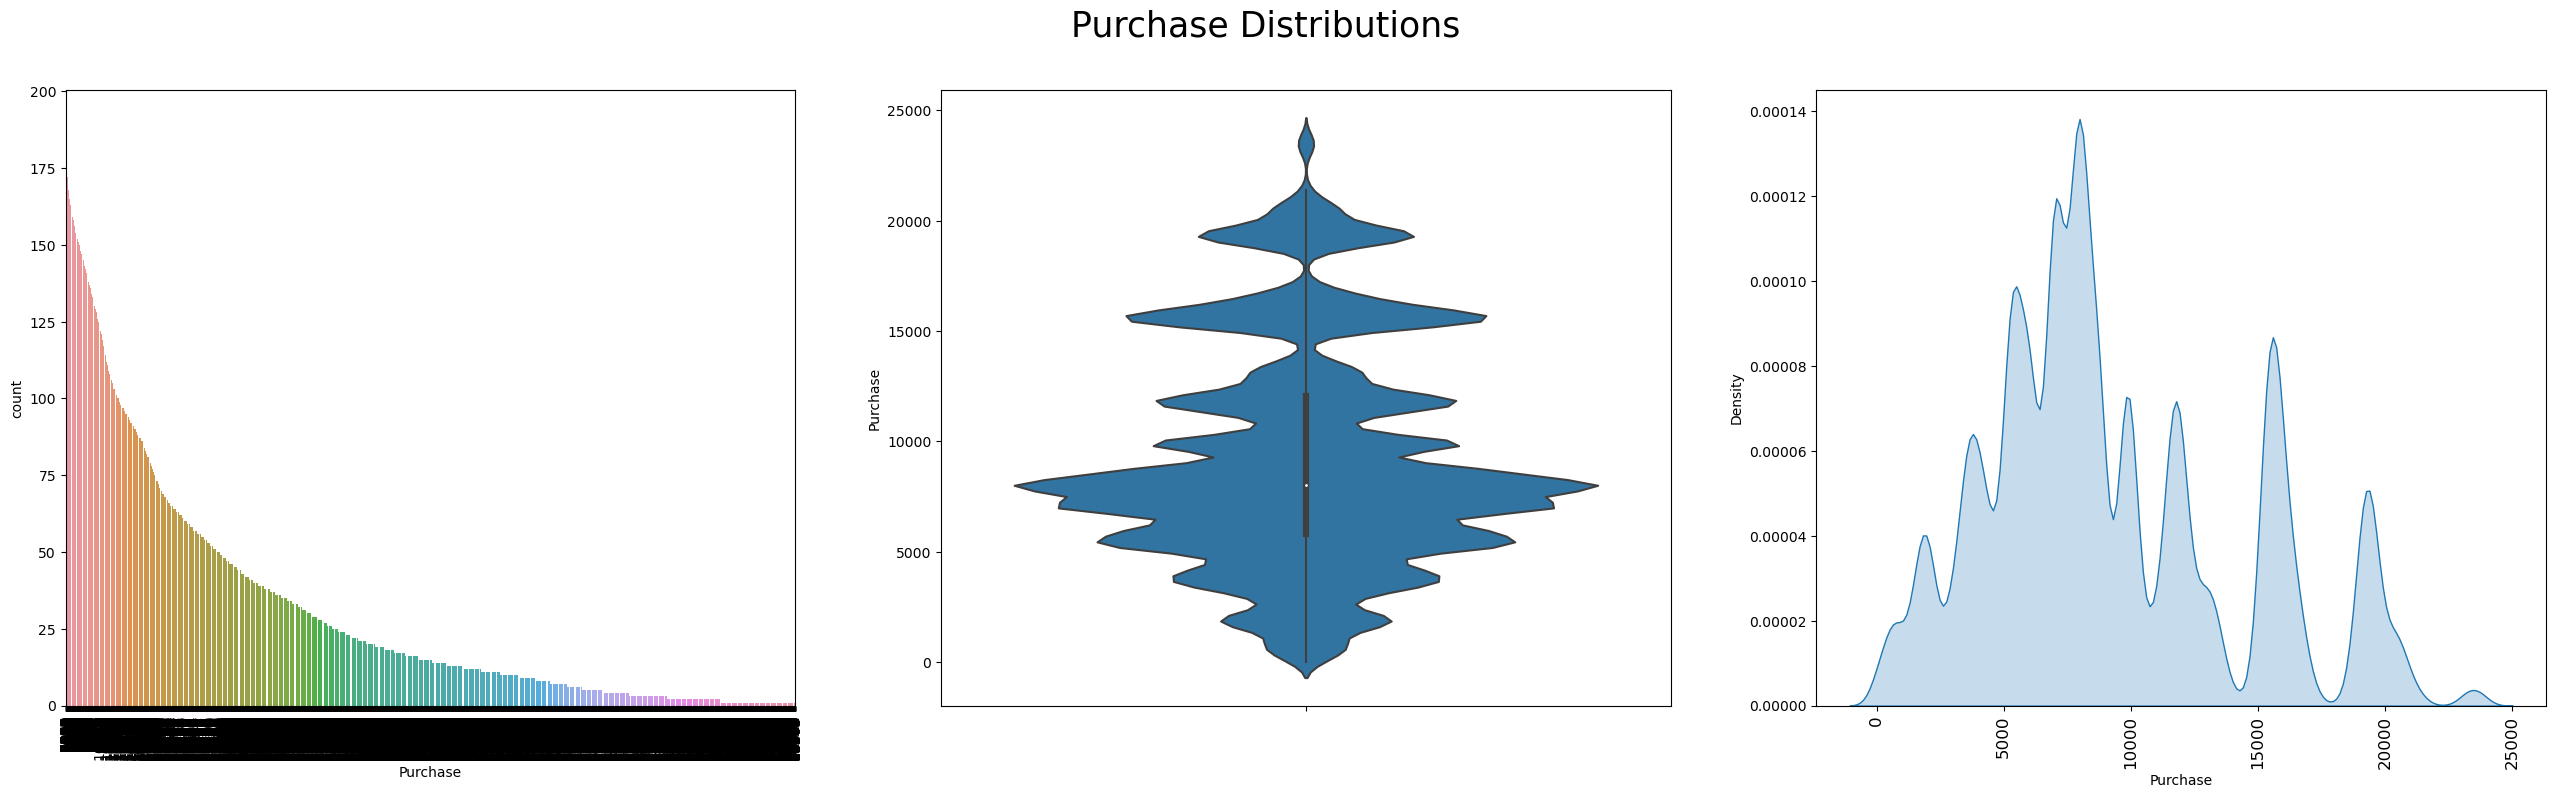

In [23]:
for col in ['User_ID', 'Purchase']:
    plt.figure(figsize=(32, 8))
    plt.subplot(1, 3, 1)
    sns.countplot(data=df,
                 x=col,
                 order = df[col].value_counts().index)
    plt.xticks(rotation=90)
    plt.subplot(1, 3, 2)
    sns.violinplot(data=df,
                 y=col,
               fill=True)
    plt.xticks(rotation=90)
    plt.subplot(1, 3, 3)
    sns.kdeplot(data=df,
                 x=col,
               fill=True)
    plt.xticks(size=12, rotation=90)
    plt.suptitle(col + ' Distributions', size=25)
    plt.show()

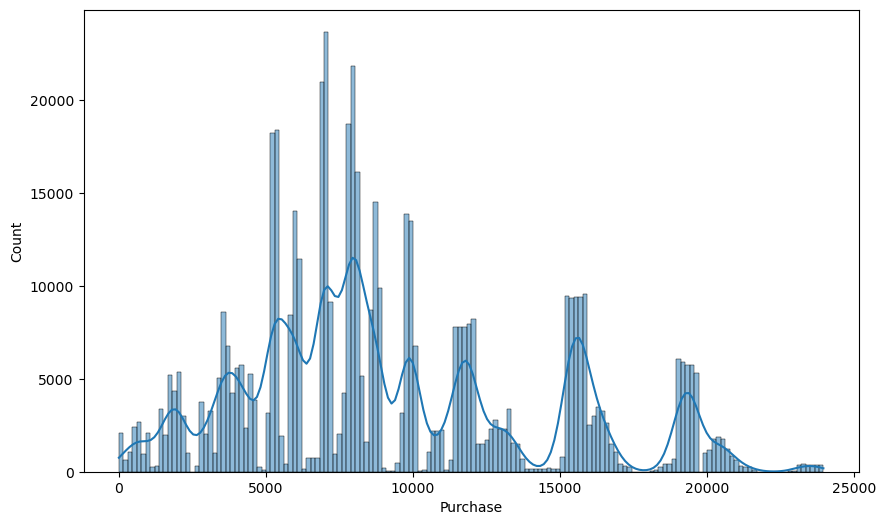

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Purchase', kde=True)
plt.show()

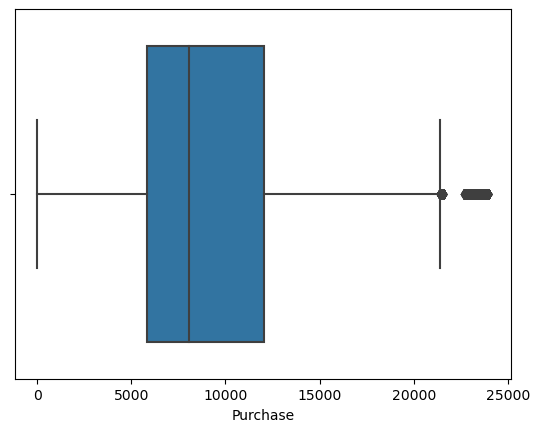

In [25]:
sns.boxplot(data=df, x='Purchase', orient='h')
plt.show()

### `Categorical Variables`

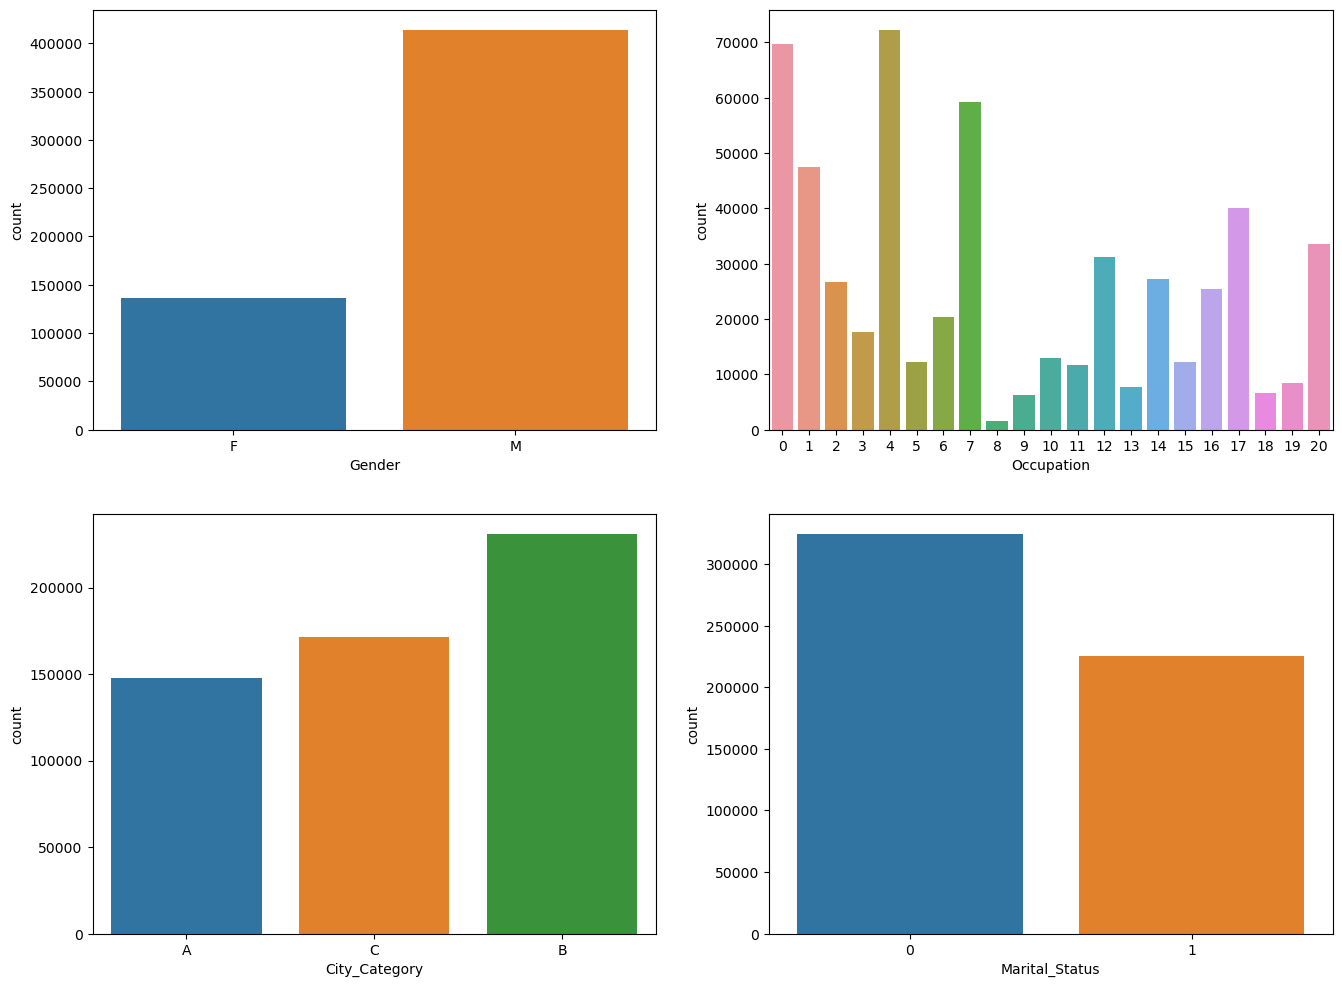

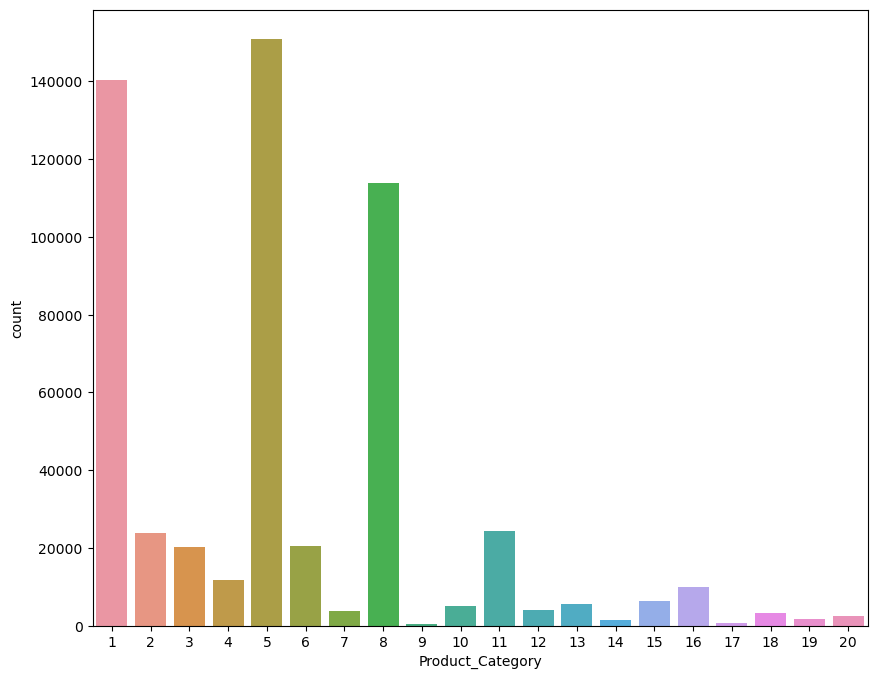

In [26]:
categorical_cols = ['Gender', 'Occupation','City_Category','Marital_Status','Product_Category']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
sns.countplot(data=df, x='Gender', ax=axs[0,0])
sns.countplot(data=df, x='Occupation', ax=axs[0,1])
sns.countplot(data=df, x='City_Category', ax=axs[1,0])
sns.countplot(data=df, x='Marital_Status', ax=axs[1,1])
plt.show()

plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='Product_Category')
plt.show()

**Observations**
 - Most of the users are Male
 - There are 20 different types of Occupation and Product_Category
 - More users belong to B City_Category
 - More users are Single as compare to Married
 - Product_Category - 1, 5, 8, & 11 have highest purchasing frequency.

## 3.2 Multivariate Analysis

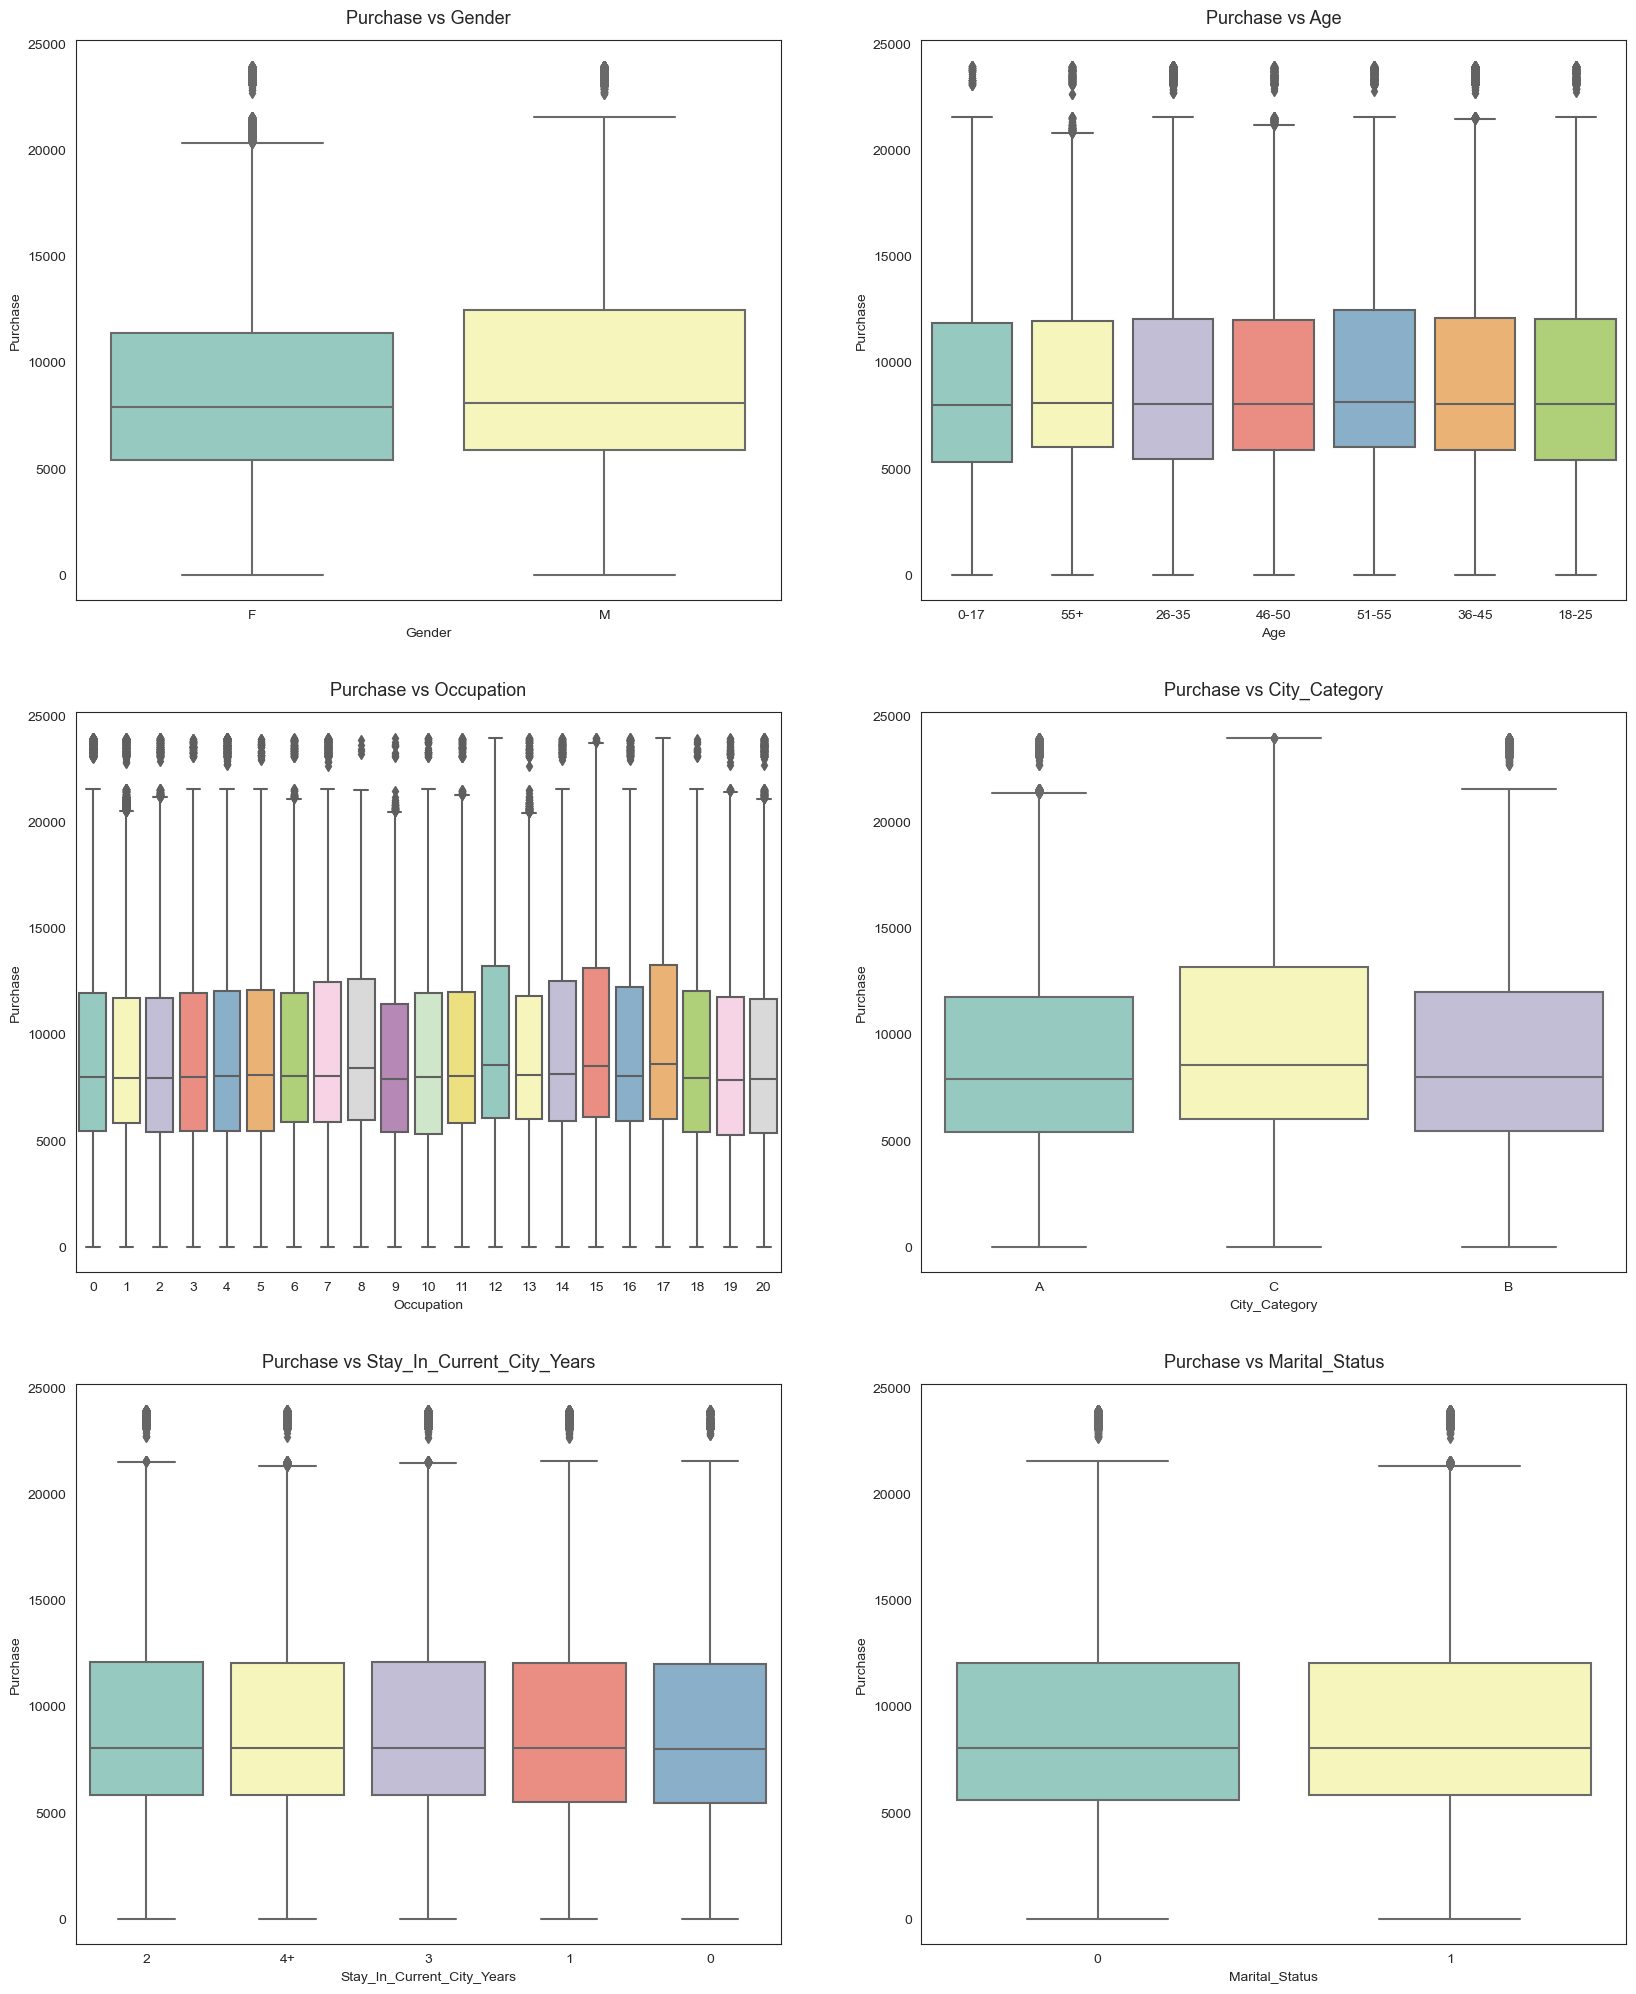

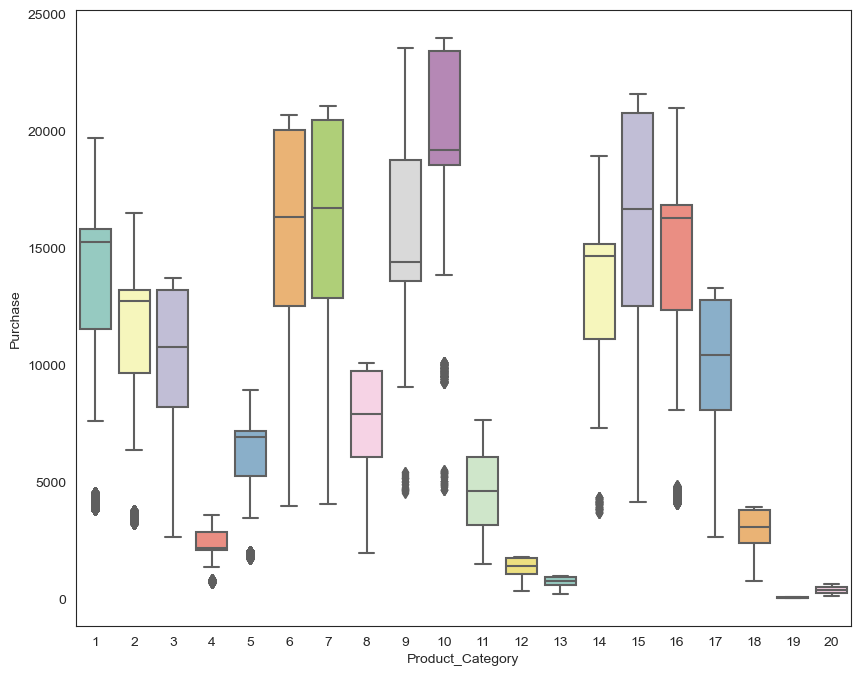

In [27]:
attrs = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
sns.set_style("white")

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 16))
fig.subplots_adjust(top=1.3)
count = 0
for row in range(3):
    for col in range(2):
        sns.boxplot(data=df, y='Purchase', x=attrs[count], ax=axs[row, col], palette='Set3')
        axs[row,col].set_title(f"Purchase vs {attrs[count]}", pad=12, fontsize=13)
        count += 1
plt.show()

plt.figure(figsize=(10, 8))
sns.boxplot(data=df, y='Purchase', x=attrs[-1], palette='Set3')
plt.show()

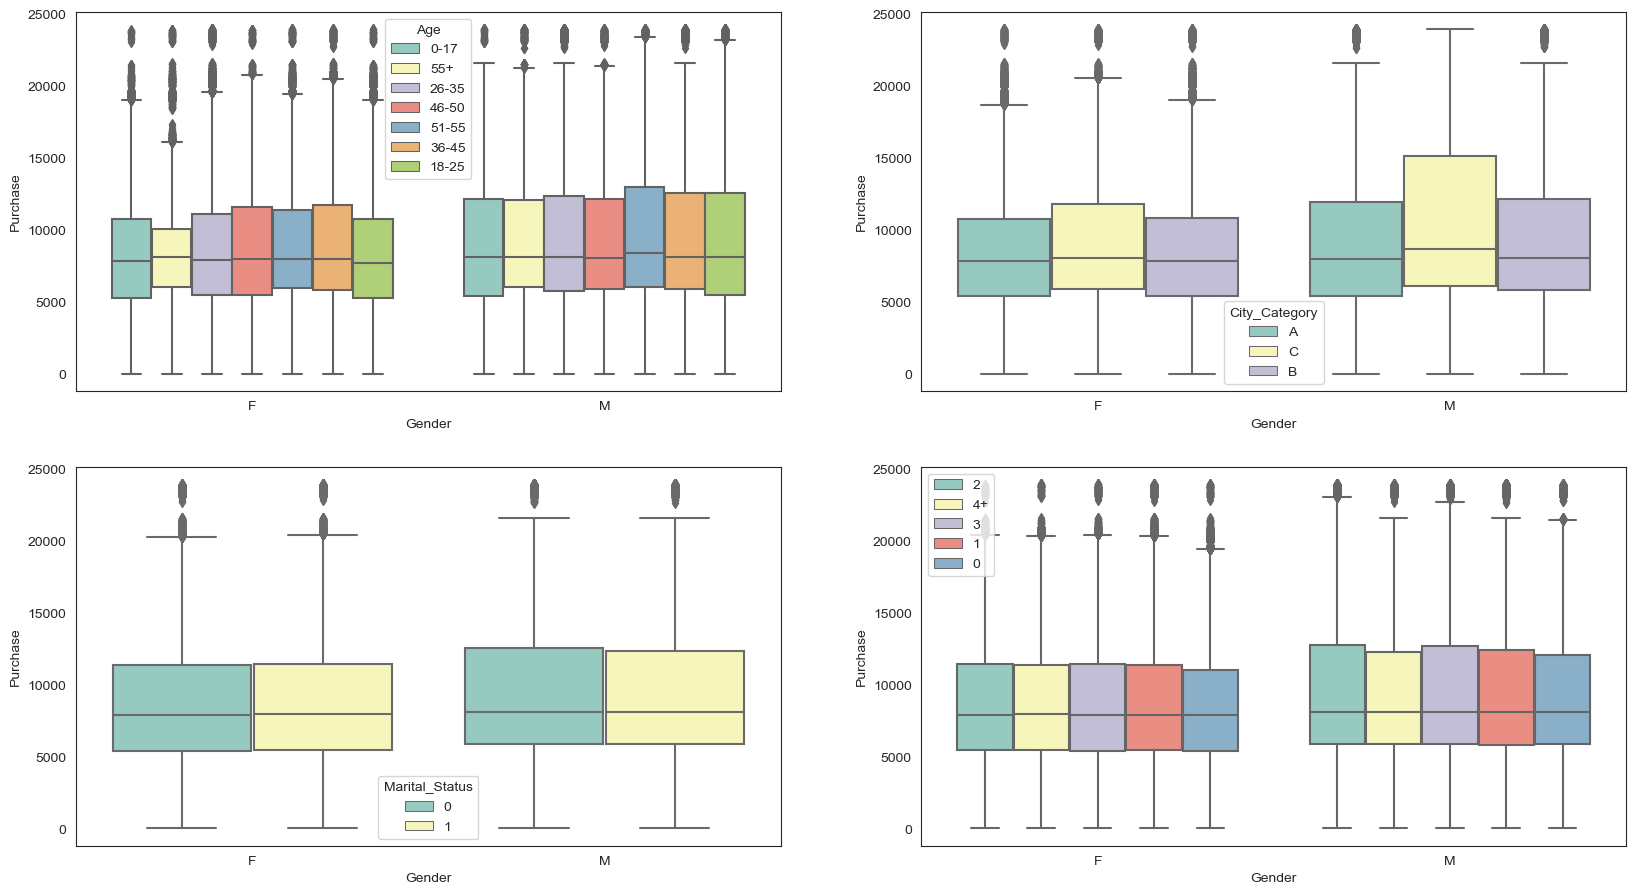

In [28]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 6))
fig.subplots_adjust(top=1.5)
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Age', palette='Set3', ax=axs[0,0])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='City_Category', palette='Set3', ax=axs[0,1])

sns.boxplot(data=df, y='Purchase', x='Gender', hue='Marital_Status', palette='Set3', ax=axs[1,0])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Stay_In_Current_City_Years', palette='Set3', ax=axs[1,1])
axs[1,1].legend(loc='upper left')

plt.show()

# 4. Questions

## Q1. Are women spending more money per transaction than men? Why or Why not? 

In [29]:
amt_df = df.groupby(['User_ID', 'Gender'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001
...,...,...,...
5886,1006036,F,4116058
5887,1006037,F,1119538
5888,1006038,F,90034
5889,1006039,F,590319


In [30]:
# Gender wise value counts in avg_amt_df
avg_amt_df = df['Gender'].value_counts(normalize=True)
avg_amt_df

M    0.753105
F    0.246895
Name: Gender, dtype: float64

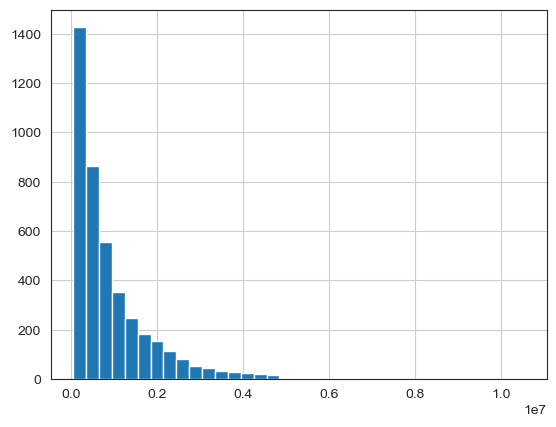

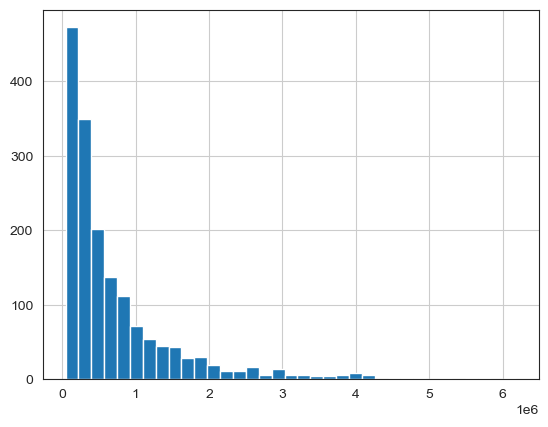

In [31]:
# histogram of average amount spend for each customer - Male & Female
amt_df[amt_df['Gender']=='M']['Purchase'].hist(bins=35)
plt.show()

amt_df[amt_df['Gender']=='F']['Purchase'].hist(bins=35)
plt.show()

In [32]:
male_avg = amt_df[amt_df['Gender']=='M']['Purchase'].mean()
female_avg = amt_df[amt_df['Gender']=='F']['Purchase'].mean()

print("Average amount spend by Male customers: {:.2f}".format(male_avg))
print("Average amount spend by Female customers: {:.2f}".format(female_avg))

Average amount spend by Male customers: 925344.40
Average amount spend by Female customers: 712024.39


**Observation**

 - Male customers spend more money than female customers
 - We observe that males have a comparatively higher number of high-value transactions(>10k) which shifts the mean transaction amount for males higher

## Q2. Confidence intervals and distribution of the mean of the expenses by female and male customers 

In [33]:
male_df = amt_df[amt_df['Gender']=='M']
female_df = amt_df[amt_df['Gender']=='F']

In [34]:
genders = ["M", "F"]

male_sample_size = 3000
female_sample_size = 1500
num_repitions = 1000
male_means = []
female_means = []

for _ in range(num_repitions):
    male_mean = male_df.sample(male_sample_size, replace=True)['Purchase'].mean()
    female_mean = female_df.sample(female_sample_size, replace=True)['Purchase'].mean()
    
    male_means.append(male_mean)
    female_means.append(female_mean)


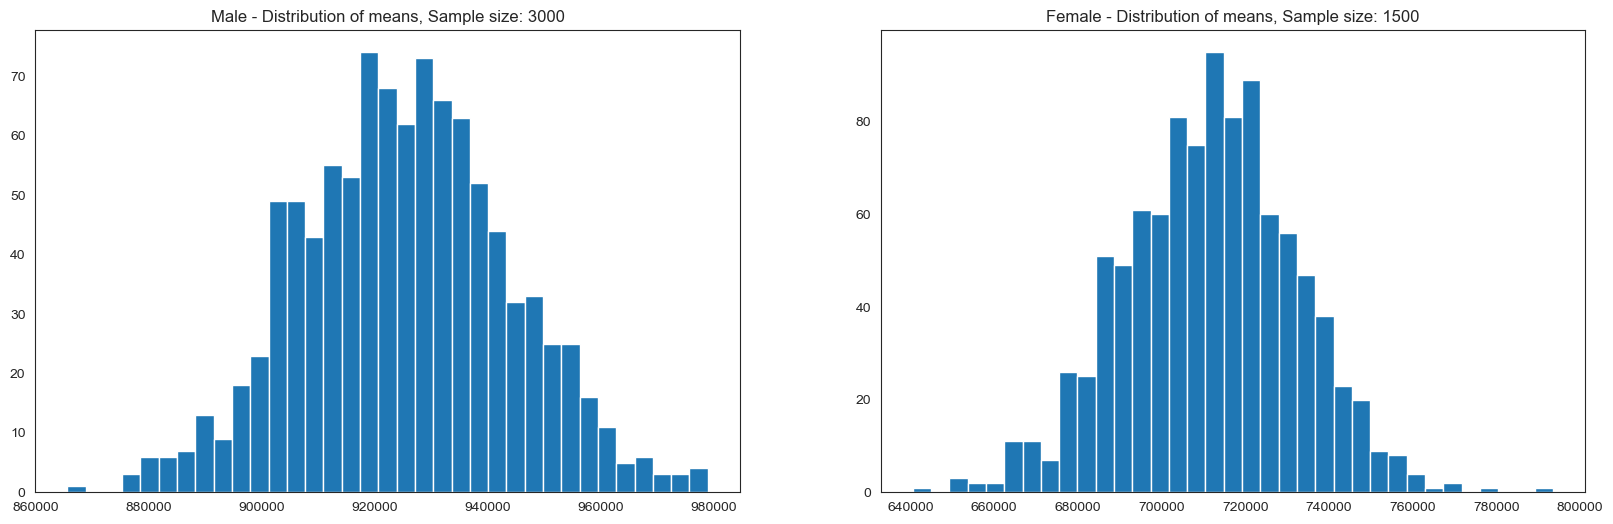

In [35]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(male_means, bins=35)
axis[1].hist(female_means, bins=35)
axis[0].set_title("Male - Distribution of means, Sample size: 3000")
axis[1].set_title("Female - Distribution of means, Sample size: 1500")

plt.show()

In [36]:
print("Population mean - Mean of sample means of amount spend for Male: {:.2f}".format(np.mean(male_means)))
print("Population mean - Mean of sample means of amount spend for Female: {:.2f}".format(np.mean(female_means)))

print("\nMale - Sample mean: {:.2f} Sample std: {:.2f}".format(male_df['Purchase'].mean(), male_df['Purchase'].std()))
print("Female - Sample mean: {:.2f} Sample std: {:.2f}".format(female_df['Purchase'].mean(), female_df['Purchase'].std()))

Population mean - Mean of sample means of amount spend for Male: 925231.46
Population mean - Mean of sample means of amount spend for Female: 711499.30

Male - Sample mean: 925344.40 Sample std: 985830.10
Female - Sample mean: 712024.39 Sample std: 807370.73


**Observation**

*Now using the Central Limit Theorem for the population we can say that:*

 - Average amount spend by male customers is 9,26,341.86
 - Average amount spend by female customers is 7,11,704.09

In [37]:
male_margin_of_error_clt = 1.96*male_df['Purchase'].std()/np.sqrt(len(male_df))
male_sample_mean = male_df['Purchase'].mean()
male_lower_lim = male_sample_mean - male_margin_of_error_clt
male_upper_lim = male_sample_mean + male_margin_of_error_clt

female_margin_of_error_clt = 1.96*female_df['Purchase'].std()/np.sqrt(len(female_df))
female_sample_mean = female_df['Purchase'].mean()
female_lower_lim = female_sample_mean - female_margin_of_error_clt
female_upper_lim = female_sample_mean + female_margin_of_error_clt

print("Male confidence interval of means: ({:.2f}, {:.2f})".format(male_lower_lim, male_upper_lim))
print("Female confidence interval of means: ({:.2f}, {:.2f})".format(female_lower_lim, female_upper_lim))

Male confidence interval of means: (895617.83, 955070.97)
Female confidence interval of means: (673254.77, 750794.02)


**Now we can infer about the population that, 95% of the times:**

1. Average amount spend by male customer will lie in between: (895617.83, 955070.97)
2. Average amount spend by female customer will lie in between: (673254.77, 750794.02)

## Q3. Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements? 

***95% CI for mean amount spent by Male and Female customers:***
- Males: 
    - [925239-(1.96\*50492), 925239+(1.96\*50492)] = [826275, 1024203]
- Females: 
    - [712079-(1.96\*38338), 712079+(1.96\*38338)] = [636937, 787221]
- We can conclude with 95% Confidence that the mean amount spent by Males and Females do not overlap
- Mean amount spent by males is more than that of females
- We need a sample size of around 320 to be able to make that conclusion

***How can Walmart leverage the above data?***

- The above information is applicable to the entire population
- Thus Walmart should prioritize male customers during Black Friday as that ensures a higher chance of generating more revenue
- Products specifically catered to males can be launched during Black Friday
- We can also look at the historical data about the top performing products for males to get an idea about the product portfolio for future Black Friday sales
- Some incentives and discounts can also be announced for females to encourage them to make more purchases on the platform

## Q4. Results when the same activity is performed for Married vs Unmarried 

In [38]:
amt_df

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001
...,...,...,...
5886,1006036,F,4116058
5887,1006037,F,1119538
5888,1006038,F,90034
5889,1006039,F,590319


In [39]:
amt_df = df.groupby(['User_ID', 'Marital_Status'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df

,User_ID,Marital_Status,Purchase
0,1000001,0,334093
1,1000002,0,810472
2,1000003,0,341635
3,1000004,1,206468
4,1000005,1,821001
...,...,...,...
5886,1006036,1,4116058
5887,1006037,0,1119538
5888,1006038,0,90034
5889,1006039,1,590319


In [40]:
amt_df['Marital_Status'].value_counts()

0    3417
1    2474
Name: Marital_Status, dtype: int64

- In our dataset, we have following number of data points:
    - Single: 3.4k
    - Married: 2.5k

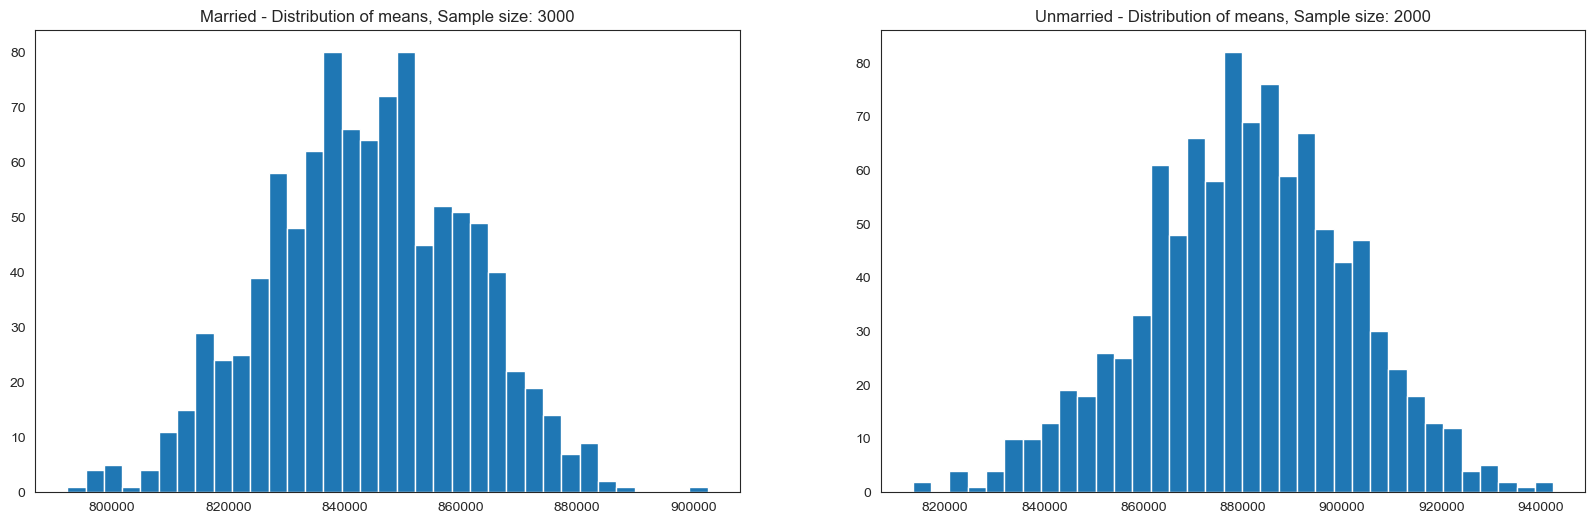

Population mean - Mean of sample means of amount spend for Married: 843941.59
Population mean - Mean of sample means of amount spend for Unmarried: 880594.90

Married - Sample mean: 843526.80 Sample std: 935352.12
Unmarried - Sample mean: 880575.78 Sample std: 949436.25


In [41]:
married_samp_size = 3000
unmarried_sample_size = 2000
num_repitions = 1000
married_means = []
unmarried_means = []

for _ in range(num_repitions):
    married_mean = amt_df[amt_df['Marital_Status']==1].sample(married_samp_size, replace=True)['Purchase'].mean()
    unmarried_mean = amt_df[amt_df['Marital_Status']==0].sample(unmarried_sample_size, replace=True)['Purchase'].mean()
    
    married_means.append(married_mean)
    unmarried_means.append(unmarried_mean)
    
    
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(married_means, bins=35)
axis[1].hist(unmarried_means, bins=35)
axis[0].set_title("Married - Distribution of means, Sample size: 3000")
axis[1].set_title("Unmarried - Distribution of means, Sample size: 2000")

plt.show()

print("Population mean - Mean of sample means of amount spend for Married: {:.2f}".format(np.mean(married_means)))
print("Population mean - Mean of sample means of amount spend for Unmarried: {:.2f}".format(np.mean(unmarried_means)))

print("\nMarried - Sample mean: {:.2f} Sample std: {:.2f}".format(amt_df[amt_df['Marital_Status']==1]['Purchase'].mean(), amt_df[amt_df['Marital_Status']==1]['Purchase'].std()))
print("Unmarried - Sample mean: {:.2f} Sample std: {:.2f}".format(amt_df[amt_df['Marital_Status']==0]['Purchase'].mean(), amt_df[amt_df['Marital_Status']==0]['Purchase'].std()))

In [42]:
for val in ["Married", "Unmarried"]:
    
    new_val = 1 if val == "Married" else 0
    
    new_df = amt_df[amt_df['Marital_Status']==new_val] 
    
    margin_of_error_clt = 1.96*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("{} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

Married confidence interval of means: (806668.83, 880384.76)
Unmarried confidence interval of means: (848741.18, 912410.38)


## Q5. Results when the same activity is performed for Age 

In [43]:
amt_df = df.groupby(['User_ID', 'Age'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df

,User_ID,Age,Purchase
0,1000001,0-17,334093
1,1000002,55+,810472
2,1000003,26-35,341635
3,1000004,46-50,206468
4,1000005,26-35,821001
...,...,...,...
5886,1006036,26-35,4116058
5887,1006037,46-50,1119538
5888,1006038,55+,90034
5889,1006039,46-50,590319


In [44]:
amt_df['Age'].value_counts()

26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
Name: Age, dtype: int64

In [45]:
sample_size = 200
num_repitions = 1000

all_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for age_interval in age_intervals:
    all_means[age_interval] = []

for age_interval in age_intervals:
    for _ in range(num_repitions):
        mean = amt_df[amt_df['Age']==age_interval].sample(sample_size, replace=True)['Purchase'].mean()
        all_means[age_interval].append(mean)

In [46]:
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:
    
    new_df = amt_df[amt_df['Age']==val] 
    
    margin_of_error_clt = 1.96*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("For age {} --> confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

For age 26-35 --> confidence interval of means: (945034.42, 1034284.21)
For age 36-45 --> confidence interval of means: (823347.80, 935983.62)
For age 18-25 --> confidence interval of means: (801632.78, 908093.46)
For age 46-50 --> confidence interval of means: (713505.63, 871591.93)
For age 51-55 --> confidence interval of means: (692392.43, 834009.42)
For age 55+ --> confidence interval of means: (476948.26, 602446.23)
For age 0-17 --> confidence interval of means: (527662.46, 710073.17)


# 5. Insights

**Insights**
 - ~ 80% of the users are between the age 18-50 (40%: 26-35, 18%: 18-25, 20%: 36-45)
 - 75% of the users are Male and 25% are Female
 - 60% Single, 40% Married
 - 35% Staying in the city from 1 year, 18% from 2 years, 17% from 3 years
 - Total of 20 product categories are there
 - There are 20 differnent types of occupations in the city


 - Most of the users are Male
 - There are 20 different types of Occupation and Product_Category
 - More users belong to B City_Category
 - More users are Single as compare to Married
 - Product_Category - 1, 5, 8, & 11 have highest purchasing frequency.


 - Average amount spend by Male customers: 925344.40
 - Average amount spend by Female customers: 712024.39


**Confidence Interval by Gender**

*Now using the Central Limit Theorem for the population:*

 - Average amount spend by male customers is 9,26,341.86
 - Average amount spend by female customers is 7,11,704.09
 
*Now we can infer about the population that, 95% of the times:*

 - Average amount spend by male customer will lie in between: (895617.83, 955070.97)
 - Average amount spend by female customer will lie in between: (673254.77, 750794.02)
 
**Confidence Interval by Marital_Status**
 - Married confidence interval of means: (806668.83, 880384.76)
 - Unmarried confidence interval of means: (848741.18, 912410.38)
 
**Confidence Interval by Age**
 - For age 26-35 --> confidence interval of means: (945034.42, 1034284.21)
 - For age 36-45 --> confidence interval of means: (823347.80, 935983.62)
 - For age 18-25 --> confidence interval of means: (801632.78, 908093.46)
 - For age 46-50 --> confidence interval of means: (713505.63, 871591.93)
 - For age 51-55 --> confidence interval of means: (692392.43, 834009.42)
 - For age 55+ --> confidence interval of means: (476948.26, 602446.23)
 - For age 0-17 --> confidence interval of means: (527662.46, 710073.17)

# 6. Recommendations

 1. Men spent more money than women, So company should focus on retaining the male customers and getting more male customers.
 2. Product_Category - 1, 5, 8, & 11 have highest purchasing frequency. it means these are the products in these categories are liked more by customers. Company can focus on selling more of these products or selling more of the products which are purchased less.
 3. Unmarried customers spend more money than married customers, So company should focus on acquisition of Unmarried customers.
 4. Customers in the age 18-45 spend more money than the others, So company should focus on acquisition of customers who are in the age 18-45
 5. Male customers living in City_Category C spend more money than other male customers living in B or C, Selling more products in the City_Category C will help the company increase the revenue.